<a href="https://colab.research.google.com/github/smrutisanchita/CE888/blob/main/Lab_3/Bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import cross_val_score, ShuffleSplit, RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix,SCORERS
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


* We have loaded the necessary libraries above
* Now let's load the data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
# convert a string variable to a categorical one
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Now let's prepare the data by cleaning it up and choosing the relevant column we would like to predict

In [6]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [7]:
df_dummies.drop(['duration'],inplace=True,axis=1)

In [8]:
df_dummies.isna().sum() # checking if there is any null values

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

In [9]:
y = df_dummies['y']
X =df_dummies.drop(['y'],axis=1)

In [10]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

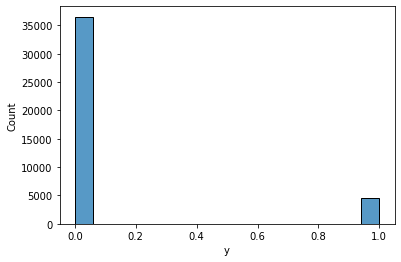

In [11]:
sns_plot = sns.histplot(y, kde=False)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=50)

In [16]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

As this is a imbalanced dataset we will use F1 Score

## 1. Dummy Classifier


In [82]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("F1 Score is:" , (dummy_scores.mean()))

F1 Score is: 0.11204537015248597


## 2. Random Forest with CV=10

###  F1 Score



In [19]:
 clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("F1 Score is:" , (scores.mean()))

F1 Score is: 0.23976636224853168


### Weighted F1 Score



In [20]:
clf_w = RandomForestClassifier(n_estimators=100, max_depth=3)
scores_w = cross_val_score(clf_w,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted') ) # cross-validation
print("Weighted F1 Score is:" , (scores_w.mean()))

Weighted F1 Score is: 0.8661329815015876


In [23]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # Accuracy

0.8997329448895363

Dummy classifier has F1 Score as 0.11


10 fold CV Random forest classifier has F1 score as 0.24

In [24]:
rfc_grid = {'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)],
              'max_depth': range(3,10)}
rfc_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=50), param_grid=rfc_grid, cv=5, verbose=1,n_jobs=-1)
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed: 61.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=50,
                                  

In [26]:
print('Train Accuracy for KNN: ', rfc_gs.score(X_train, y_train))
print('Best Parameters:',rfc_gs.best_estimator_)

Train Accuracy for KNN:  0.9096813353566009
Best Parameters: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)


### Top 3 Features are :
Feature ranking:
1. euribor3m (0.184103)
2. nr.employed (0.140160)
3. pdays (0.113532)

In [31]:
rfc = RandomForestClassifier(n_estimators=95, max_depth=9,random_state=50)
rfc.fit(X_train, y_train)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
features = X.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


[ 7  8  2 61  4  6  5  0  3 52 49  1 43 59 42 50 55 60 44 53 31 33 54 56
 23 17 58 28 48 38 10 57 22 34  9 14 36 18 41 30 39 27 25 45 32 21 13 16
 47 51 15 26 19 37 20 12 46 40 11 24 29 35]
Feature ranking:
1. euribor3m (0.184103)
2. nr.employed (0.140160)
3. pdays (0.113532)
4. poutcome_success (0.078764)
5. emp.var.rate (0.063372)
6. cons.conf.idx (0.060691)
7. cons.price.idx (0.052759)
8. age (0.040792)
9. previous (0.029420)
10. month_oct (0.015789)
11. month_mar (0.015191)
12. campaign (0.013301)
13. contact_telephone (0.013171)
14. poutcome_failure (0.013074)
15. contact_cellular (0.011780)
16. month_may (0.009684)
17. day_of_week_mon (0.007534)
18. poutcome_nonexistent (0.007489)
19. month_apr (0.006995)
20. month_sep (0.006674)
21. education_university.degree (0.005916)
22. default_no (0.004783)
23. day_of_week_fri (0.004545)
24. day_of_week_thu (0.004269)
25. marital_single (0.004183)
26. job_student (0.004074)
27. day_of_week_wed (0.004032)
28. education_high.school (0.004032

In [34]:
rfc.score(X_test, y_test) 

0.9007040543821316

Now let's train the classifier on the whole dataset

In [32]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix


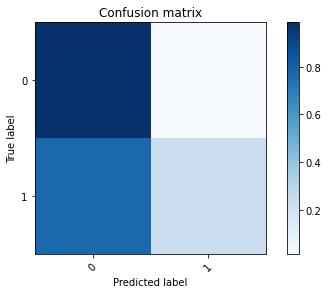

In [33]:
# Compute confusion matrix
y_pred = rfc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.pdf", bbox_inches='tight')